In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

Upload all the images to the colab disk before running the code below.


#Part 1 Normalising of the images by their own CDFs

Below code imports the images using the PIL library. And then using numpy it is converted to the grayscale values for each pixel.

In [ ]:
raw_image = Image.open('/content/grey_1.png')
image = ImageOps.grayscale(raw_image)
pixels = np.array(image)
print(pixels)

[[ 31  26  22 ... 106 106 107]
 [ 27  21  18 ... 105 113 116]
 [ 23  21  22 ... 109 110 107]
 ...
 [ 47  48  50 ... 127 120 113]
 [ 41  40  36 ... 129 112  94]
 [ 53  54  56 ...  98  96  95]]


I tried using np.histogram function, but it is was creating one extra bin was creating a problem in the code further. What it does was it was dividing the pixels in 256 parts and creating 257 elements.

So I defined here a function for calculating the unique values. But for some images some grayscales values were not present, so we need to add them to satisfy the demand of the length of the array and maintaining the uniformity of the code. Here first we take the values using np.unique then check which values are not present in the image. Then map that values to zeros. Also np.where does the same thing as list.index() does, it finds out where the number is equal to given value and returns a array, so we need to add [0] to make it scalar and then changing the values of the arrays at required indices.

In [ ]:
def count_vals(arr):
    """
    arr: ndarray
    returns values and counts of that values.
    """
    t_values, t_counts = np.unique(arr, return_counts=True)
    values = np.array([k for k in range(0, 256)])
    counts = np.array([0]*256)
    for i in t_values:
        counts[i] = t_counts[np.where(t_values == i)[0]]
    return values, counts


In [ ]:
values, counts = count_vals(pixels)
# values, counts

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


Histogram is a barplot, but it shows us the frequency that how many times a element is appeared.

In [ ]:
plt.bar(values, counts, color='b', width=1)
plt.title('Histogram of grey1.png')

Text(0.5, 1.0, 'Histogram of grey1.png')

probability for each element is stored in variable px. Which can be given as counts/sum(counts), effectively dividing all the elements of counts by sum(counts) to get the probability.

Then CDF is calculated using cumsum.

Then we multiplied the CDF by 255 and round it using np.round to get the normalized distribution of the image.

In [ ]:
px = counts/sum(counts)
cdf = np.cumsum(px)
cdf = cdf * 255
cdf = np.round(cdf)
cdf = np.array(cdf, dtype=int)

Below code is used to plot the histogram of normalised image

In [ ]:
plt.bar(cdf, counts)
plt.title('Normalised Image1')

Text(0.5, 1.0, 'Normalised Image1')

Below I am creating a dictionary to map the values to their cdf round off values. Storing the original and final pixel values.

In [ ]:
hash_map = {values[i]:cdf[i] for i in range(256)}

And then finally, using the hashmap created above, I am mapping the original values to the provided by the cdf round off. To notice here I didn't use any inbuilt function because they were causing problems, e.g. during first iteration 1 was changed to 43 and then later 43 was changed to 88. So inbuilt functions were not helping in this context.

then creating an final array for the image and stored its normalised values. Displayed the image using the matplotlib functions.

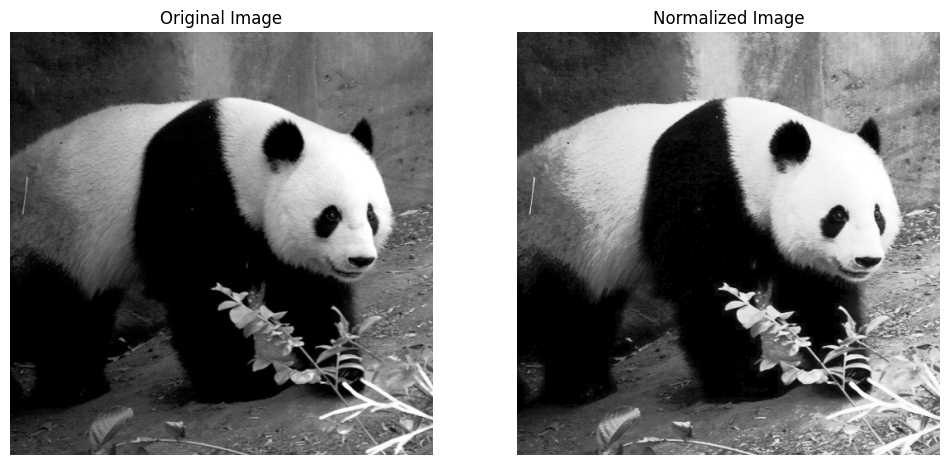

In [ ]:
final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.imshow(pixels, cmap='gray')
ax1.axis('off')
ax1.set_title('Original Image')
ax2.imshow(final_pixels, cmap='gray')
ax2.axis('off')
ax2.set_title('Normalized Image')
plt.show()
final_pixels_1 = final_pixels

## Doing all the above steps for Image 2, 3 and 4.

In the code cells below, all the above steps are performed in a single cell. From importing the image to taking its cdf and normalising it and then displaying the normalised image again.

### Image 2

In [ ]:
raw_image = Image.open('/content/grey_2.png')
image = ImageOps.grayscale(raw_image)
pixels = np.array(image)
values, counts = count_vals(pixels)
px = counts/sum(counts)
cdf = np.cumsum(px)
cdf = cdf * 255
cdf = np.round(cdf)
cdf = np.array(cdf, dtype=int)
hash_map = {values[i]:cdf[i] for i in range(256)}
final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.imshow(pixels, cmap='gray')
ax1.axis('off')
ax1.set_title('Original Image')
ax2.imshow(final_pixels, cmap='gray')
ax2.axis('off')
ax2.set_title('Normalized Image')
plt.show()
final_pixels_2 = final_pixels


<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


### Image 3

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


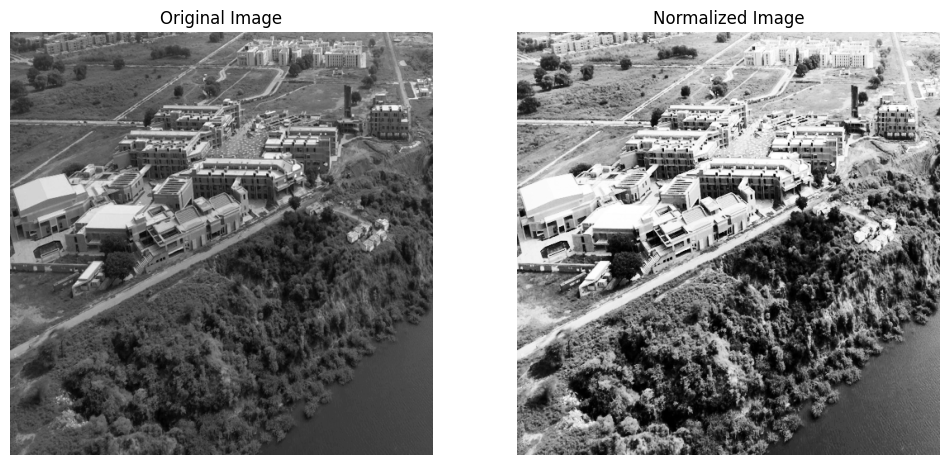

In [ ]:
raw_image = Image.open('/content/grey_3.png')
image = ImageOps.grayscale(raw_image)
pixels = np.array(image)
values, counts = count_vals(pixels)
px = counts/sum(counts)
cdf = np.cumsum(px)
cdf = cdf * 255
cdf = np.round(cdf)
cdf = np.array(cdf, dtype=int)
hash_map = {values[i]:cdf[i] for i in range(256)}
final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.imshow(pixels, cmap='gray')
ax1.axis('off')
ax1.set_title('Original Image')
ax2.imshow(final_pixels, cmap='gray')
ax2.axis('off')
ax2.set_title('Normalized Image')
plt.show()
final_pixels_3 = final_pixels


### Image 4

In [ ]:
raw_image = Image.open('/content/grey_4.png')
image = ImageOps.grayscale(raw_image)
pixels = np.array(image)
values, counts = count_vals(pixels)
px = counts/sum(counts)
cdf = np.cumsum(px)
cdf = cdf * 255
cdf = np.round(cdf)
cdf = np.array(cdf, dtype=int)
hash_map = {values[i]:cdf[i] for i in range(256)}
final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.imshow(pixels, cmap='gray')
ax1.axis('off')
ax1.set_title('Original Image')
ax2.imshow(final_pixels, cmap='gray')
ax2.axis('off')
ax2.set_title('Normalized Image')
plt.show()
final_pixels_4 = final_pixels


<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


#Part 2 Matching one image with CDF of other image

In this section we are going to match cdf of one image with other image. This works on the strategy of mapping the cdf of one image to the nearest value of cdf of the other image. Then creating a hash_map and then finally making an array of all new grayscale values using the hashmap made previously.

Below imports the images, calculates probabilities and then finds the cdfs for both source and target image.

In [ ]:
raw_image = Image.open('/content/grey_1.png')
s_image = ImageOps.grayscale(raw_image)
s_pixels = np.array(s_image)
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

raw_image = Image.open('/content/grey_2.png')
t_image = ImageOps.grayscale(raw_image)
t_pixels = np.array(t_image)
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


This is the critical part where we find the nearest cdf value corresponding to each grayscale value. Here np.newaxis is used to add a axis, which is helpful in changing the dimension of the array to (n,1). It transforms it to a 2D array. Here the concept of broadcasting comes into play, so when you have a 2D array now of dimension (n,1) and when this array is subtracted from cdf of target (cdf_t), it substract each value of cdf_s from cdf_t and returns their absolute value as array which is stored in difference.

Then np.argmin() is used to find the minimum value, from the differences array along axis one, which will effectively give us the nearest value for the cdf.

Lets take an example.
Here are some CDF values below.

```
a = [0.2, 0.4, 1.0]
b = [0.3, 0.7, 1.0]
```
Lets tranform the matrix 'a'

```
a = [[0.2]
    [0.4]
    [1.0]]
```
and then while subtracting matrix 'b' from this 'a', what will happen is dimention of 'b' is not same as 'a' so it will change itself, this is called broadcasting.
```
b = [[0.3, 0.7, 1.0]
    [0.3, 0.7, 1.0]
    [0.3, 0.7, 1.0]]
```
now 'b' will be subtracted from 'a' and finally in each row we will get array of all the subtracted absolute values and then using np.argmin we will pick the one with minimum difference and that will be the map of that particular pixel value.




In [ ]:
differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

In [ ]:
final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


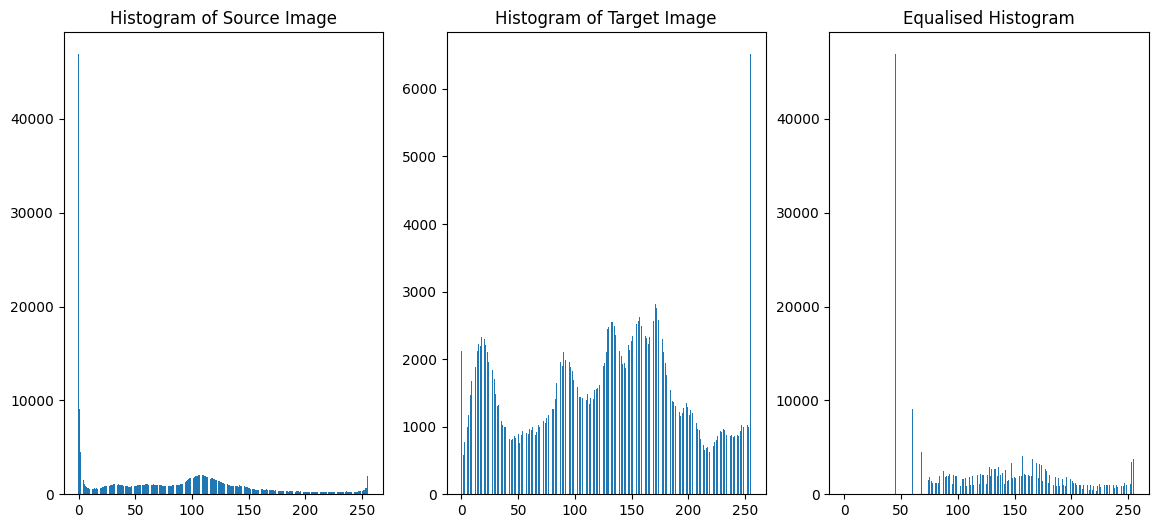

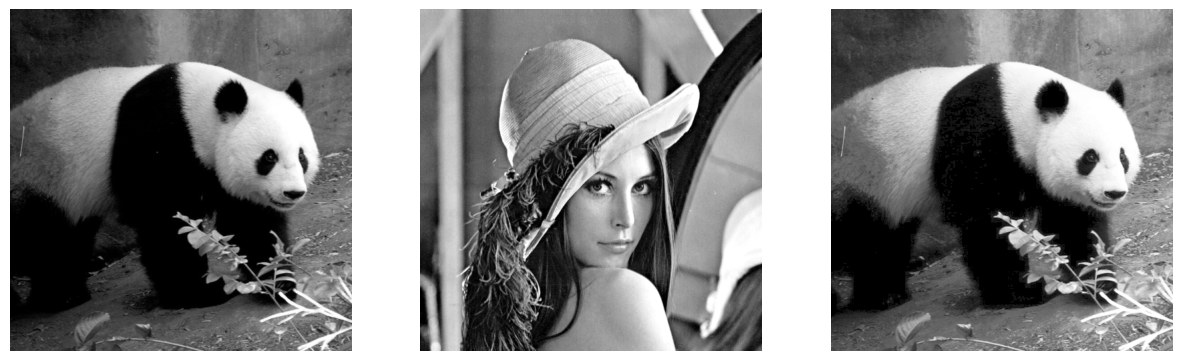

In [ ]:
f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()

## Doing the above steps for the next 3 matchings

### Source: Image 4, Target: Image 3

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


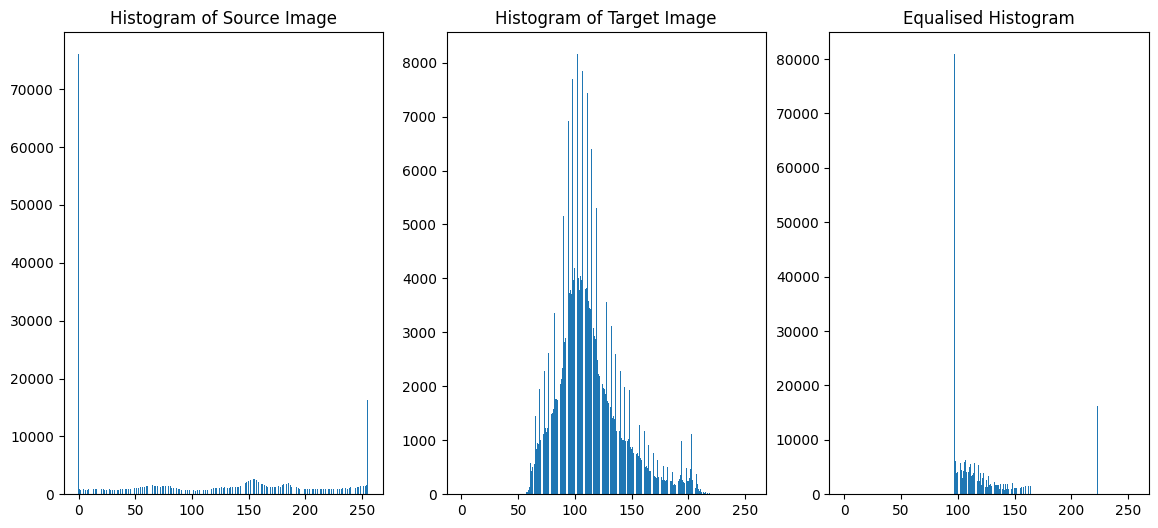

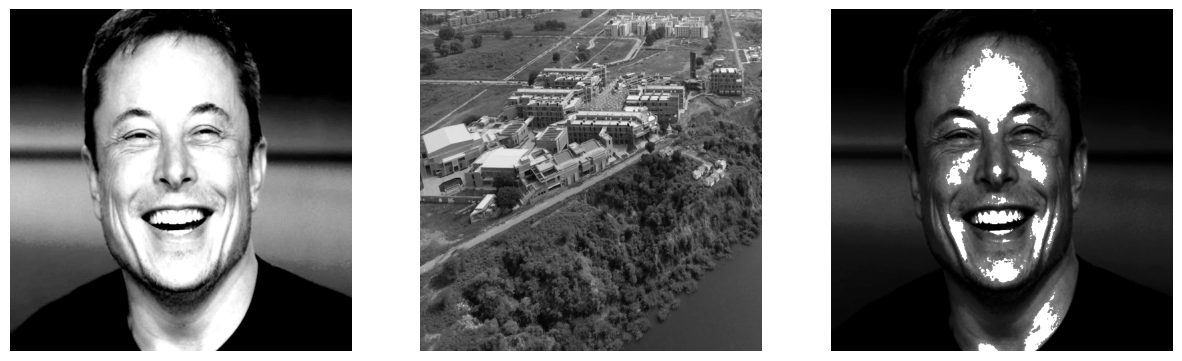

In [ ]:
raw_image = Image.open('/content/grey_4.png')
s_image = ImageOps.grayscale(raw_image)
s_pixels = np.array(s_image)
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

raw_image = Image.open('/content/grey_3.png')
t_image = ImageOps.grayscale(raw_image)
t_pixels = np.array(t_image)
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()


### Source: Image 2, Target: Image 4

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


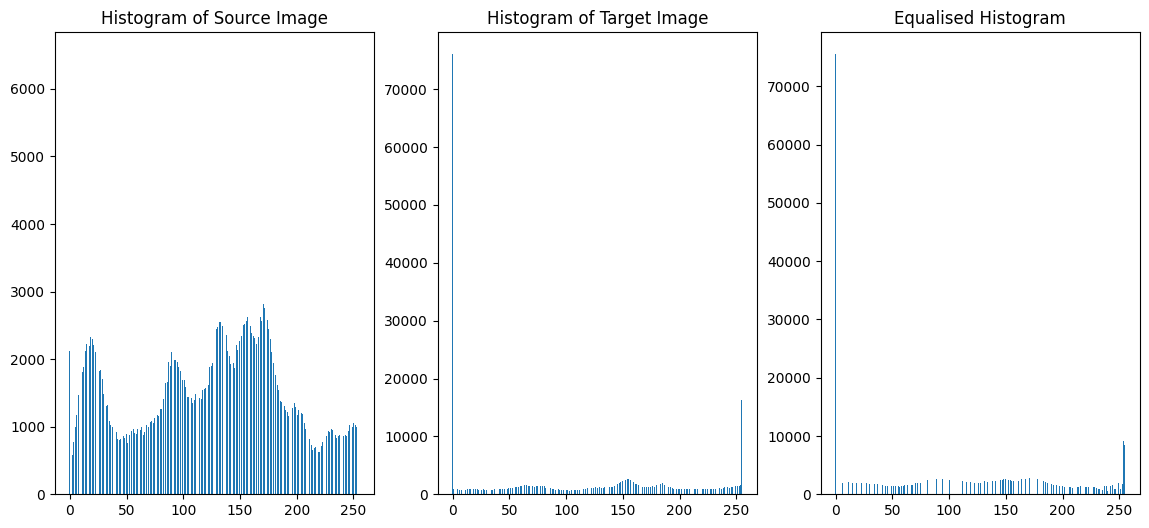

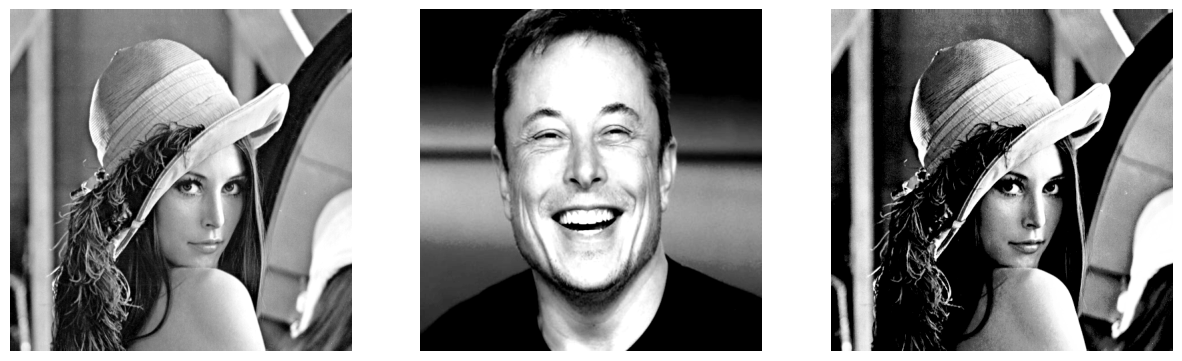

In [ ]:
raw_image = Image.open('/content/grey_2.png')
s_image = ImageOps.grayscale(raw_image)
s_pixels = np.array(s_image)
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

raw_image = Image.open('/content/grey_4.png')
t_image = ImageOps.grayscale(raw_image)
t_pixels = np.array(t_image)
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()


### Source: Image 3, Target: Image 1

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


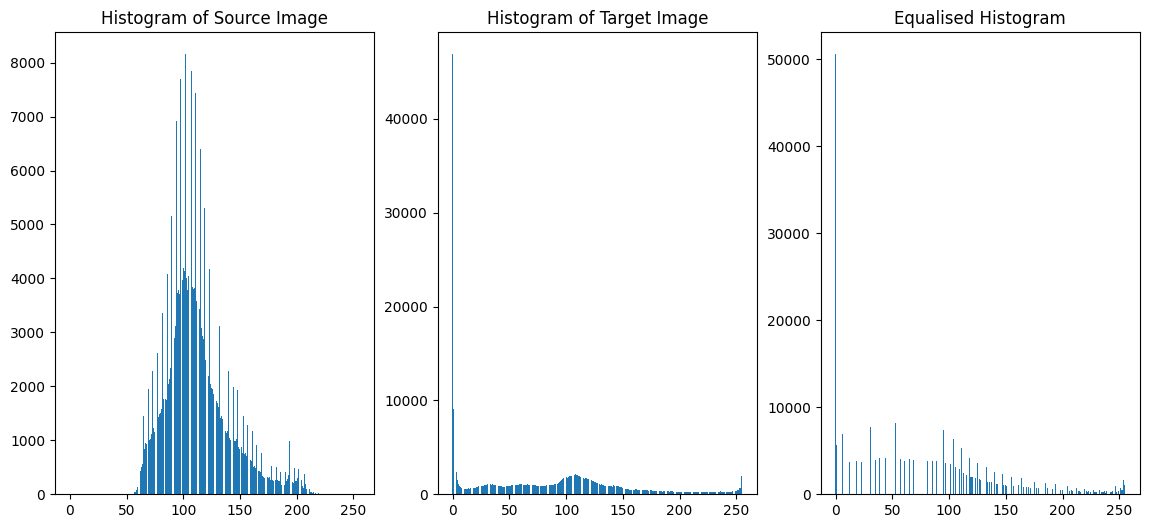

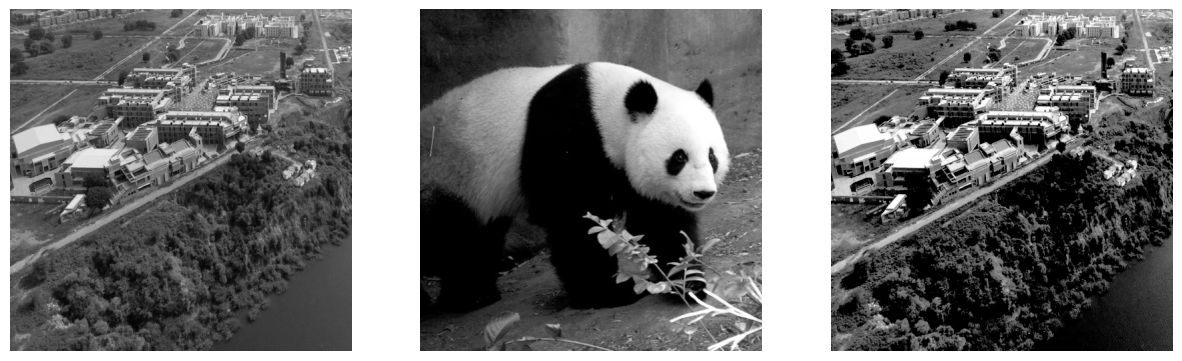

In [ ]:
raw_image = Image.open('/content/grey_3.png')
s_image = ImageOps.grayscale(raw_image)
s_pixels = np.array(s_image)
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

raw_image = Image.open('/content/grey_1.png')
t_image = ImageOps.grayscale(raw_image)
t_pixels = np.array(t_image)
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()


### Given example matching

Checking my code using the sample images provided. Here I have done a slight change because the size of image was not 512x512 px, so i have made the final array of the size of image. Other part of CDF matching is the same.

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


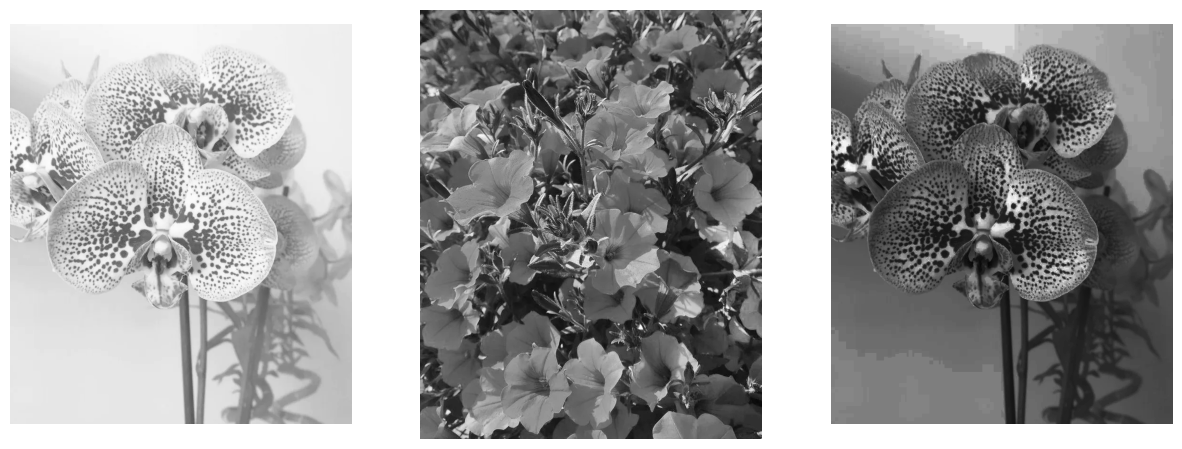

In [ ]:
raw_image = Image.open('/content/imageA.png')
s_image = ImageOps.grayscale(raw_image)
s_pixels = np.array(s_image)
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

raw_image = Image.open('/content/imageB.png')
t_image = ImageOps.grayscale(raw_image)
t_pixels = np.array(t_image)
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

m = s_pixels.shape
final_pixels = np.array([[0]*m[1]]*m[0])
for i in range(m[0]):
    for j in range(m[1]):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
# ax1.bar(s_values, s_counts)
# ax2.bar(t_values, t_counts)
# ax3.bar(f_values, f_counts)
# plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()

# Part 3 Matching the Normalized images

Here we are going to match normalized images (done in first part) with each other to get the results. Algorithm for matching is same as of used in Part 2.

## Source: Image 1, Target: Image 2

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


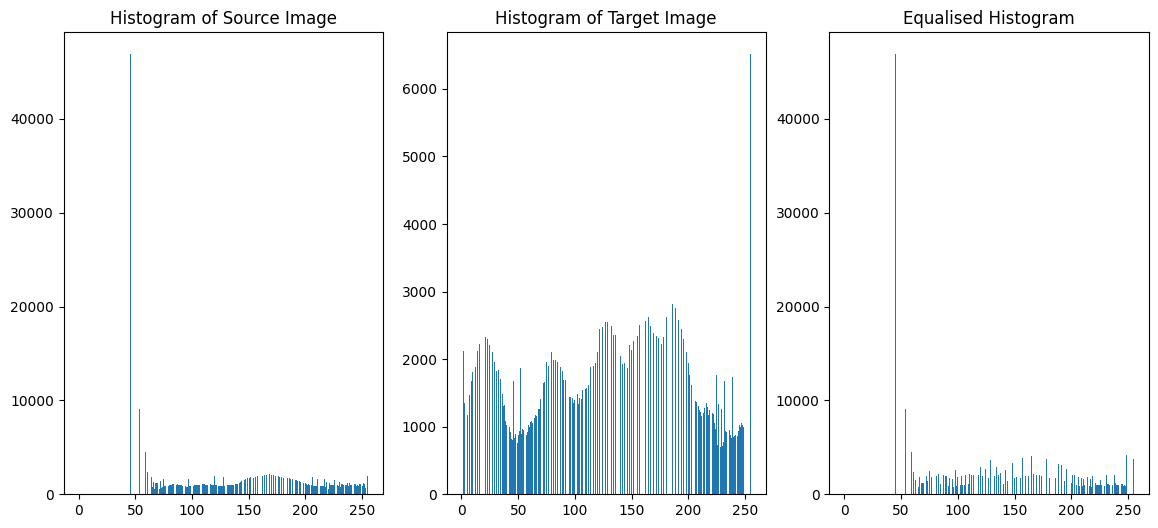

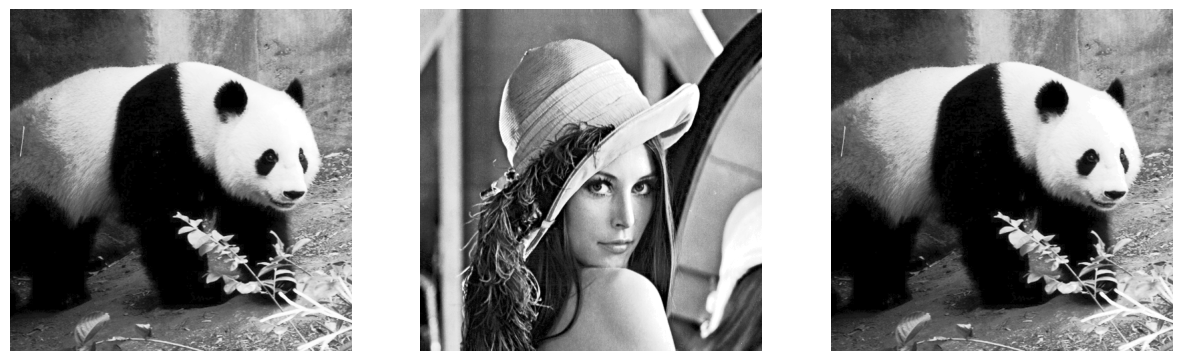

In [ ]:
s_pixels = final_pixels_1
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

t_pixels = final_pixels_2
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()

## Source: Image 4, Target: Image 3

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


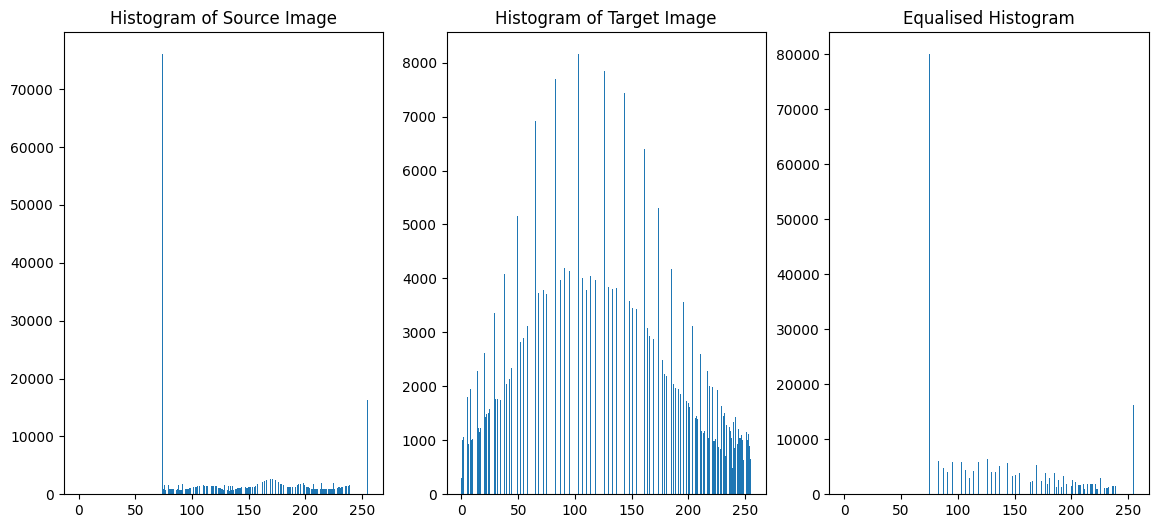

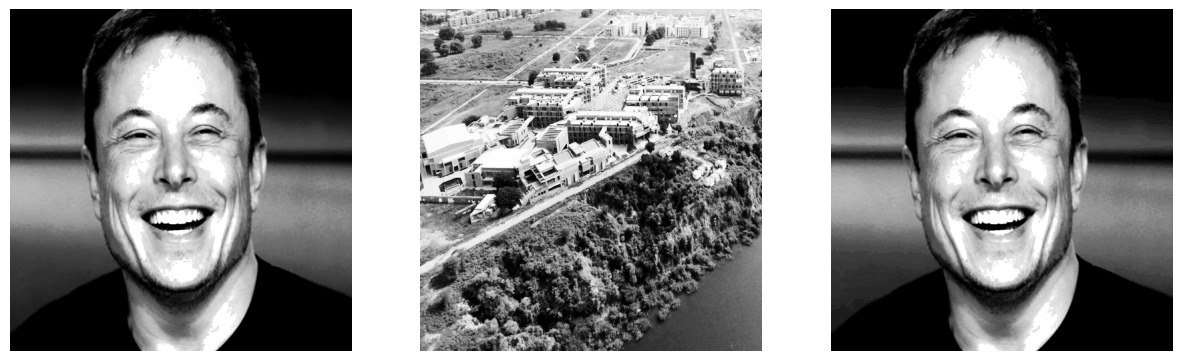

In [ ]:
s_pixels = final_pixels_4
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

t_pixels = final_pixels_3
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()

## Source: Image 2, Target: Image 4

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]


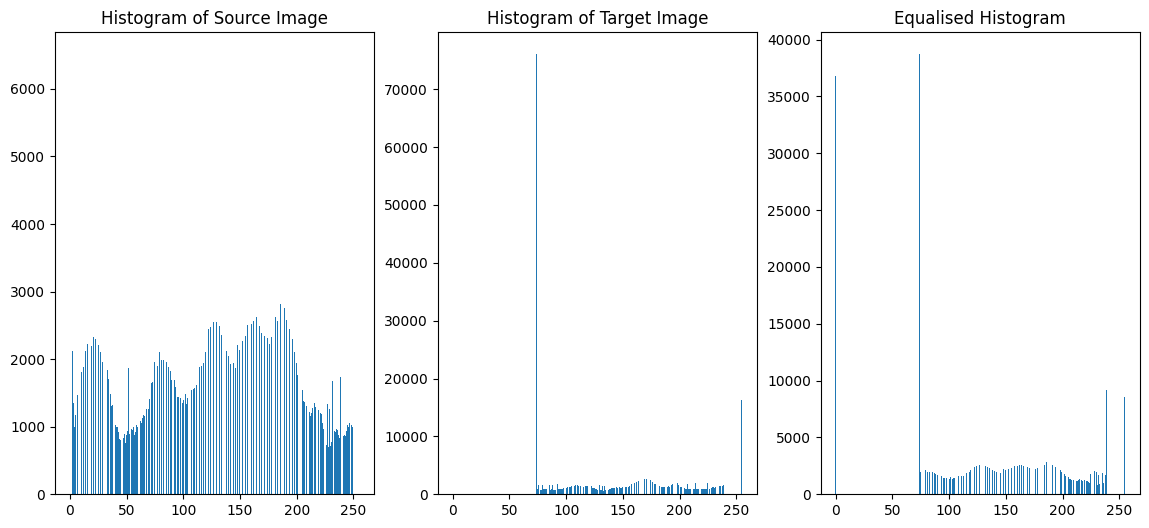

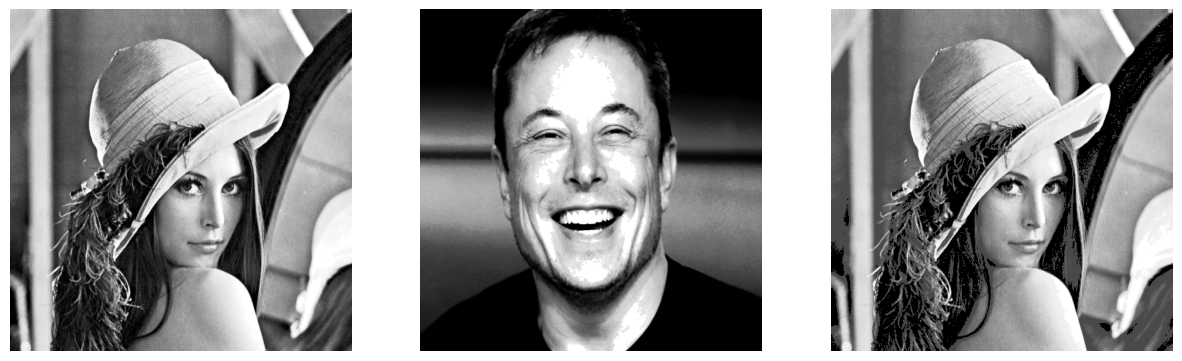

In [ ]:
s_pixels = final_pixels_2
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

t_pixels = final_pixels_4
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()

## Source: Image 3, Target: Image 1

In [ ]:
s_pixels = final_pixels_3
s_values, s_counts = count_vals(s_pixels)
px_s = s_counts/sum(s_counts)
cdf_s = np.cumsum(px_s)

t_pixels = final_pixels_1
t_values, t_counts = count_vals(t_pixels)
px_t = t_counts/sum(t_counts)
cdf_t = np.cumsum(px_t)

differences = np.abs(cdf_s[:, np.newaxis] - cdf_t)
nearest = np.argmin(differences, axis=1)
hash_map = {values[i]:nearest[i] for i in range(0,256)}

final_pixels = np.array([[0]*512]*512)
for i in range(512):
    for j in range(512):
        k=s_pixels[i,j]
        nval=hash_map[k]
        final_pixels[i,j]=nval

f_values, f_counts = count_vals(final_pixels)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
ax1.bar(s_values, s_counts)
ax1.set_title('Histogram of Source Image')
ax2.bar(t_values, t_counts)
ax2.set_title('Histogram of Target Image')
ax3.bar(f_values, f_counts)
ax3.set_title('Equalised Histogram')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
ax1.imshow(s_pixels, cmap='gray')
ax1.axis('off')
ax2.imshow(t_pixels, cmap='gray')
ax2.axis('off')
ax3.imshow(final_pixels, cmap='gray')
ax3.axis('off')
plt.show()

<ipython-input-3-5e4c67c4da80>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts[i] = t_counts[np.where(t_values == i)[0]]
